In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt 

In [2]:
import tensorflow as tf
from tensorflow import keras 

2024-03-29 12:06:22.497880: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
data = keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test) = data.load_data()

In [4]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat",
              "Sandal","Shirt","Sneaker","Bag","Ankle boot"]

#### Data Reshape

In [5]:
X_train_full = X_train_full.reshape((60000,28,28,1))
X_test = X_test.reshape((10000,28,28,1))

#### Data Normalization

When then normalized the data dimensions so that they are of approximately the same scale.

In [6]:
X_train_n = X_train_full / 255.
X_test_n = X_test / 255.

#### Splitting the data into train/ validation/ test datasets

In [7]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid,y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

In [8]:
np.random.seed(42)
tf.random.set_seed(42)

#### Model Architecture

In [9]:
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(filters = 32, kernel_size = (3,3), strides=1,padding='valid', activation='relu',input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten()) #flattening 2D 28 x 28 to 1D 
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

2024-03-29 13:19:44.472367: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 300)               1622700   
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                        

In [11]:
model.compile(loss="sparse_categorical_crossentropy", 
             optimizer="sgd", 
             metrics=["accuracy"])

In [12]:
model_history = model.fit(X_train,y_train,epochs=30,batch_size=64,
                         validation_data=(X_valid,y_valid))

Epoch 1/30
860/860 [==============================] - 10s 11ms/step - loss: 0.8784 - accuracy: 0.6997 - val_loss: 0.8244 - val_accuracy: 0.6986
Epoch 2/30
860/860 [==============================] - 10s 11ms/step - loss: 0.5371 - accuracy: 0.8050 - val_loss: 0.4947 - val_accuracy: 0.8108
Epoch 3/30
860/860 [==============================] - 10s 11ms/step - loss: 0.4787 - accuracy: 0.8274 - val_loss: 1.0109 - val_accuracy: 0.6924
Epoch 4/30
860/860 [==============================] - 10s 11ms/step - loss: 0.4416 - accuracy: 0.8417 - val_loss: 0.4075 - val_accuracy: 0.8622
Epoch 5/30
860/860 [==============================] - 10s 11ms/step - loss: 0.4177 - accuracy: 0.8489 - val_loss: 0.4172 - val_accuracy: 0.8534
Epoch 6/30
860/860 [==============================] - 9s 11ms/step - loss: 0.3932 - accuracy: 0.8584 - val_loss: 0.3666 - val_accuracy: 0.8746
Epoch 7/30
860/860 [==============================] - 9s 11ms/step - loss: 0.3752 - accuracy: 0.8661 - val_loss: 0.4087 - val_accuracy: 0

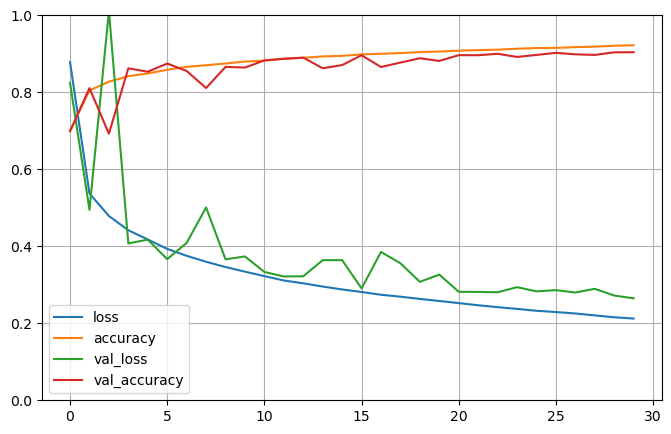

In [13]:
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [14]:
ev = model.evaluate(X_test_n,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2769 - accuracy: 0.9012


In [15]:
ev

[0.2769230902194977, 0.901199996471405]

In [16]:
x_new = X_test[:3]

In [21]:
y_proba = model.predict(x_new) #prediction
y_proba.round(2)

1/1 [==============================] - 0s 23ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [22]:
y_pred = np.argmax(y_proba, axis=1)
y_pred

array([9, 2, 1])

In [23]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

AxesImage(size=(28, 28))


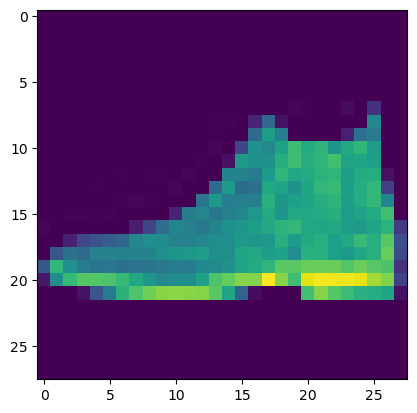

In [24]:
print(plt.imshow(X_test[0].reshape((28,28))))